In [2]:
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from datetime import datetime

Zad 1

In [6]:
netflix_data = pd.read_csv(r"netflix_titles.csv")
print("Liczba wczytanych danych: "+str(netflix_data.shape[0]))
print("Wymiar wczytanych danych: "+str(netflix_data.shape))
print("Puste wartości: \n"+str(netflix_data.isnull().sum()))

Liczba wczytanych danych: 7787
Wymiar wczytanych danych: (7787, 12)
Puste wartości: 
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


Zad 2

In [8]:
titanic_data = sns.load_dataset('titanic')
print("1. Ilość wartości pustych w zbiorze NaN: "+str((titanic_data.isna() & titanic_data.isnull()).sum().sum()))
print("2. Ilość wszystkich wartości pustych: "+str(titanic_data.isnull().sum().sum()))
print("3.")

print(titanic_data.isnull().sum())
print(titanic_data.shape[0])
#titanic_data = titanic_data.drop('nazwakolumny', axis=1)
titanic_data.sex=titanic_data.sex.map({'female': 0, 'male': 1})
titanic_data

1. Ilość wartości pustych w zbiorze NaN: 869
2. Ilość wszystkich wartości pustych: 869
3.
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
891


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Zad 3

     login        id               node_id  \
0  MikiKru  25902843  MDQ6VXNlcjI1OTAyODQz   

                                          avatar_url gravatar_id  \
0  https://avatars.githubusercontent.com/u/259028...               

                                    url                    html_url  \
0  https://api.github.com/users/MikiKru  https://github.com/MikiKru   

                                    followers_url  \
0  https://api.github.com/users/MikiKru/followers   

                                       following_url  \
0  https://api.github.com/users/MikiKru/following...   

                                           gists_url  \
0  https://api.github.com/users/MikiKru/gists{/gi...   

                                         starred_url  \
0  https://api.github.com/users/MikiKru/starred{/...   

                                   subscriptions_url  \
0  https://api.github.com/users/MikiKru/subscript...   

                           organizations_url  \
0  https://api.githu

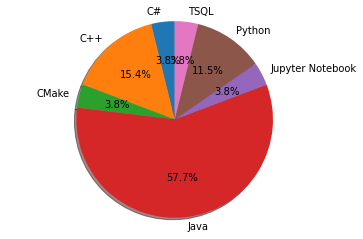

In [9]:
pd.set_option('display.max_columns', 44)

profile_MikiKru = pd.read_json('https://api.github.com/users/MikiKru',lines=True)
print(profile_MikiKru)
repos_MikiKru = pd.read_json('https://api.github.com/users/MikiKru/repos',lines=False)

languages = repos_MikiKru.groupby(['language']).size().reset_index(name='counts')['language']
counts = repos_MikiKru.groupby(['language']).size().reset_index(name='counts')['counts']

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=languages, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Zad 4

In [10]:
from datetime import date

today = date.today()
d1 = today.strftime("%d.%m.%Y")
d2 = today.strftime("%H:%M")

url = "https://www.bbc.com/weather/3102014"
data = requests.get(url)
html = BeautifulSoup(data.content, 'html.parser')
class_name = 'wr-value--temperature--c'
temp = html.findAll("span", attrs={'class' : class_name})
print("Data: "+d1+" "+d2+"\n")
print("Temperatura: "+str(temp[0]).replace('<span class="wr-value--temperature--c">',"").replace("</span>","").replace("°","C")+" / "+str(temp[1]).replace('<span class="wr-value--temperature--c">',"").replace("</span>","").replace("°","C")+"\n")
print("Jutro: "+str(temp[2]).replace('<span class="wr-value--temperature--c">',"").replace("</span>","").replace("°","C")+" / "+str(temp[3]).replace('<span class="wr-value--temperature--c">',"").replace("</span>","").replace("°","C"))

Data: 22.03.2021 00:00

Temperatura: 8C / 0C

Jutro: 9C / 3C


autorzy: Jakub Bembnista i Walter Modrak